<a href="https://colab.research.google.com/github/gaussssss/machinelearning-tpe/blob/main/implementgation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>NoteBook de TPE d'apprentissage artificiel UY I Niveau 3 Info 2021/2022</h1>

<h3>Liste des membres du TPE</h3>
<ul>
  <li>MOMENE TIYA Florian <strong>21S2785</strong></li>
  <li>TEIDA NOUTSA Remi Raoul <strong>19M2447</strong></li>
  <li>MBOCK NYENGUE Anne Claude <strong>19M2211</strong></li>
  <li>EKOH FOUAPON NJIKAM Yvan <strong>19M2198</strong></li>
</ul>
<br>
<strong><i>Par Dr. Melatagia</i></strong>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [85]:
# loading data
def data_load():
  print("data loading...")
  iris = datasets.load_iris()
  data = iris.data
  labels = iris.target
  print("data loaded.")
  return data, labels


In [91]:
# preparing data
def data_preprocessing(data, labels):
  print("Preprocessing data...")
  indices = np.random.permutation(len(data))
  n_training_samples = 12
  learn_data = data[indices[:-n_training_samples]]
  learn_labels = labels[indices[:-n_training_samples]]
  test_data = data[indices[-n_training_samples:]]
  test_labels = labels[indices[-n_training_samples:]]
  print("data preprocessed")
  
  return learn_data, learn_labels, test_data, test_labels


In [71]:
# Visualising data
def visualisation(learn_data, learn_labels):
  colours = ("r", "b")
  X = []
  for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learn_data)):
      if learn_labels[i] == iclass:
        X[iclass][0].append(learn_data[i][0])
        X[iclass][1].append(learn_data[i][1])
        X[iclass][2].append(sum(learn_data[i][2:]))
  colours = ("r", "g", "y")
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for iclass in range(3):
      ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
  plt.show()


In [72]:
#Calcule de la distance euclidienne en utilisant la fonction norm du module np.linalg
def distance(instance1, instance2):
  #Calculates the Eucledian distance between two instances
  #ou instance1 et instance2 represente les coordonnées (représenter sous forme de liste ou tableau) des points dont on veut évaluer la distance qui leur sépare
  return np.linalg.norm(np.subtract(instance1, instance2))

In [73]:
# affichage de la liste des voisins d'un point
# Pour le faire, on utilise la méthode get_neighbors qui prend en paramètre le jeu de 
#de données d'apprentissage,les étiquettes,l'intance de test dont on veut connaitre les voisins,le nombre de voisin et la distance  
#qui est une liste qui va contenir les distances entre le jeu de donnée d'apprentissage et l'instance de test

def get_neighbors(training_set,
                  labels,
                  test_instance,
                  k):
  distances = []
  for index in range(len(training_set)):
    dist = distance(test_instance, training_set[index])
    distances.append((training_set[index], dist, labels[index]))
  distances.sort(key=lambda x: x[1])
  neighbors = distances[:k]
  return neighbors

In [74]:
def get_class(selected_Kvalues):
    labels_list = list(set(selected_Kvalues[0]))
    score_labels_list = {}
    for labels, diff in selected_Kvalues:
      if labels not in score_labels_list:
        score_labels_list[labels] = 1
      else:
        score_labels_list[labels] += 1
    return sorted(score_labels_list)[-1]

In [81]:
#Test de la fonction en utilisant le dataset iris

def knn_classifier(training_data, training_labels, test_data, K):
    print("Running KNN Classifier...")
    
    result = []
    for test_item in test_data:
        similarity = [] 
        for index in range(len(training_data)):
            euclidean_diff =\
                distance(test_item, training_data[index])
            similarity.append((training_labels[index], euclidean_diff))

        # Sort list in ascending order based on euclidean difference
        similarity = sorted(similarity, key = lambda i:i[1])

        # Select K nearest neighbours
        selected_Kvalues = []
        selected_Kvalues.extend(similarity[:K])
        # Predicting the class of email
        result.append(get_class(selected_Kvalues))
    return result


In [82]:
#Détermination de la classe a associé à l'instance de test
#Utilisation de la classe counter du module collections pour conter le nombre d'intance de chaque classe qui sont les plus proches voisins de l'instance de test

def vote(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  return class_counter.most_common(1)[0][0]


In [83]:
#Création d'une fonction qui va retourner le label ainsi que la probabilité de choisir ce label

def vote_prob(neighbors):
  class_counter = Counter()
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  labels, votes = zip(*class_counter.most_common())
  winner = class_counter.most_common(1)[0][0]
  votes4winner = class_counter.most_common(1)[0][1]
  return winner, votes4winner/sum(votes)

In [78]:
#Fonction qui permet de choisir la classe de l'instance de test en fonction du poids de chaque classe au voisinage de  cette instance

def vote_harmonic_weights(neighbors, all_results=True):
  class_counter = Counter()
  number_of_neighbors = len(neighbors)
  for index in range(number_of_neighbors):
      class_counter[neighbors[index][2]] += 1/(index+1)
  labels, votes = zip(*class_counter.most_common())
  #print(labels, votes)
  winner = class_counter.most_common(1)[0][0]
  votes4winner = class_counter.most_common(1)[0][1]
  if all_results:
    total = sum(class_counter.values(), 0.0)
    for key in class_counter:
      class_counter[key] /= total
    return winner, class_counter.most_common()
  else:
    return winner, votes4winner / sum(votes)




In [93]:
# Nouvelle fonction de vote

def vote_distance_weights(neighbors, all_results=True):
  class_counter = Counter()
  number_of_neighbors = len(neighbors)
  for index in range(number_of_neighbors):
    dist = neighbors[index][1]
    label = neighbors[index][2]
    class_counter[label] += 1 / (dist**2 + 1)
  labels, votes = zip(*class_counter.most_common())
  #print(labels, votes)
  winner = class_counter.most_common(1)[0][0]
  votes4winner = class_counter.most_common(1)[0][1]
  if all_results:
    total = sum(class_counter.values(), 0.0)
    for key in class_counter:
      class_counter[key] /= total
    return winner, class_counter.most_common()
  else:
    return winner, votes4winner / sum(votes)

In [79]:
def main(k): 
  data = data_load()
  data_preprocessed = data_preprocessing(*data)
  visualisation(*data_preprocessed[:2])
  tsize = len(data_preprocessed[2])
  result = knn_classifier(*data_preprocessed[:2], data_preprocessed[2][:tsize], k) 
  accuracy = accuracy_score(data_preprocessed[3][:tsize], result)

  print("training data size : " + str(len(data_preprocessed[0])))
  print("test data size     : " + str(len(data_preprocessed[2])))
  print("K value            : " + str(k))
  print("Samples tested     : " + str(tsize))
  print("% accuracy         : " + str(accuracy * 100))
  print("Number correct     : " + str(int(accuracy * tsize)))
  print("Number wrong       : " + str(int((1 - accuracy) * tsize)))

data loading...
data loaded.
Preprocessing data...
data preprocessed 




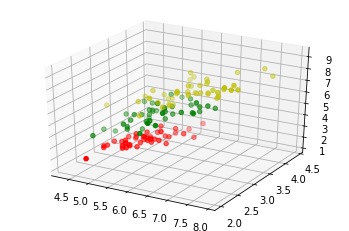

Running KNN Classifier...
training data size : 138
test data size     : 12
K value            : 20
Samples tested     : 12
% accuracy         : 83.33333333333334
Number correct     : 10
Number wrong       : 1


In [90]:
main(20)